# Sorting Colors

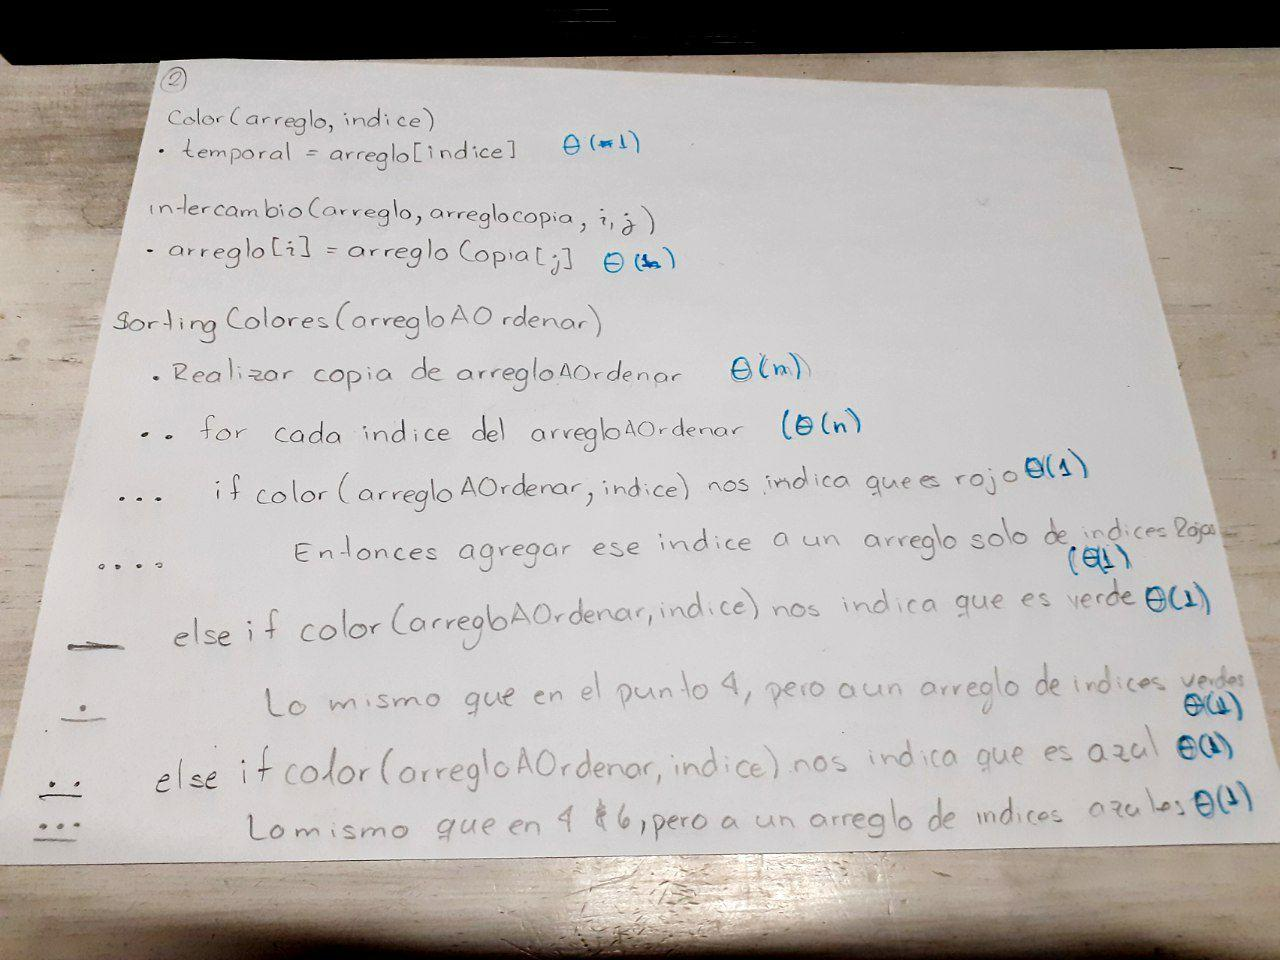

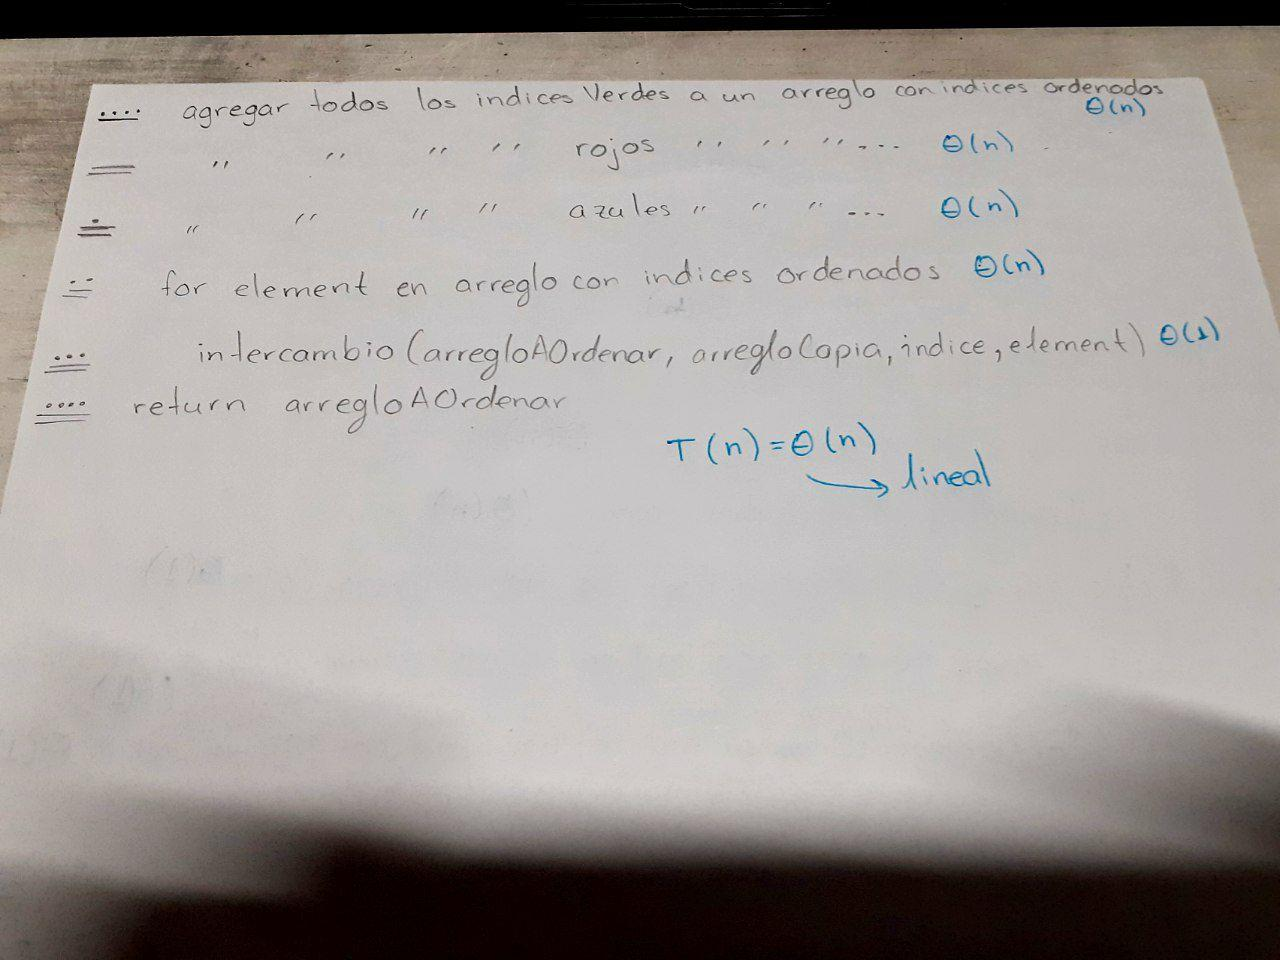

## Sobre el algoritmo
Estoy usando una reimaginación del algoritmo __counting sort__, en counting sort se realiza un conteo de los elementos del arreglo y luego se agregan al arreglo de forma ascendente, lo mejor era realizar eso, un contador y solo imprimir en orden los n elementos de cada contador, pero dadas las restricciones, lo que se me ha ocurrido es en lugar de contadores, arreglos donde se almacene el indice de sendos colores, veamos la prueba:

Tomando un arreglo de tamaño n donde $n>=1$, lo primero es crear un arreglo copia del dado en el input, luego se itera en cada indice del arreglo, tomando el inicio del arreglo (ya sea 0 o 1 dependiendo del lenguaje) hasta n, aqui vemos que en este punto hemos limitado el algoritmo, es decir no es infinito, y se revisa cada indice _i_ del arreglo, si _i_ contiene la inicial de cada color, entiendase v para verde, r para rojo y a para azul, se almacena solo el indice de cada color, supongamos tenemos un arreglo de $n=3$ : arreglo = ["r", "v", "a"], en este paso, tendriamos que "r" tiene el indice 1 (pensando en Julia), "v" tendría el indice 2 y al final, "a" tendría el indice 3, estos indices se almacenan en arreglos de cada color, así pues tenemos: ArregloIndicesRojos = [1], ArregloIndicesAzules = [3], ArregloIndicesVerdes = [2]  

Ahora, sabemos que el orden que se nos pide es verdes, rojos, azules, pensando en esto, se insertará el indice de cada color del __arreglo copia__ en el arreglo a ordenar, esto es:  

arreglo = ["r", "v", "a"]

arregloCopia = ["r", "v", "a"]

Ahora sabemos que: ArregloIndicesRojos = [1], ArregloIndicesAzules = [3], ArregloIndicesVerdes = [2]
Así, como indica el algoritmo, primero vamos al indice 2 del arreglo copia y lo insertamos en el indice 1 del arreglo original, esto nos queda:

arreglo = ["v", "v", "a"]

arregloCopia = ["r", "v", "a"]

y se hace lo mismo con los siguientes, en el orden adecuado, es decir primero los verdes, luego los rojos y al ultimos los azules. con lo que al final tenemos lo siguiente:  

arreglo = ["v", "r", "a"]

arregloCopia = ["r", "v", "a"]
y se regresa el arreglo, así tal cual, ya hemos acabado para un n = 3, pero es notorio que queda para cualquier n menor o mayor, vemos que es finito, solo como parte de la prueba se nos pide probar para n+1, así abstrayendo más lo anterior, tendriamos lo siguiente:
- creamos arregloCopia de dimensiones n : n = length(arreglo); este punto es finito, no se puede crear un arreglo mayor
- se itera obteniendo los n indices e insertandolos en cada arreglo respectivo, sigue siendo finito ya que el limite superior es n, es decir no podemos ir más allá del indice n, se itera desde 1 hasta n
- se inserta el valor del indice respectivo del arregloCopia al arreglo en el orden adecuado, vemos que sigue siendo finito, ya que si tenemos n indices, la sumatoria de los 3 arreglos de indices de cada color nos da n, así pues solo podemos insertar n valores en total
- se regresa el arreglo ya ordenado.
Ahora para n+1 tenemos:
- creamos arregloCopia de dimensiones n+1 : n+1 = length(arreglo); este punto es finito, no se puede crear un arreglo mayor __nota__ Aunque estamos escribieno n+1 queda claro que la longitud sigue siendo de n, es decir, si aumentamos el tamaño del arreglo en 1, al obtener la longitud nos seguirá dando n, por lo que podemos seguir escribiendo los demás pasos como n y no como n+1
- se itera obteniendo los n indices e insertandolos en cada arreglo respectivo, sigue siendo finito ya que el limite superior es n, es decir no podemos ir más allá del indice n, se itera desde 1 hasta n
- se inserta el valor del indice respectivo del arregloCopia al arreglo en el orden adecuado, vemos que sigue siendo finito, ya que si tenemos n indices, la sumatoria de los 3 arreglos de indices de cada color nos da n, así pues solo podemos insertar n valores en total
- se regresa el arreglo ya ordenado.
QED

## El codigo

In [1]:
function color(arreglo,indice)
    temporal = arreglo[indice]
end

function intercambio(arreglo,arregloCopia,i,j)
    arreglo[i] = arregloCopia[j]
end

function sortingColores(arregloAOrdenar)
    arregloConIndices = []
    arregloDeErrores  = []
    arregloDeRojos    = []
    arregloDeVerdes   = []
    arregloDeAzules   = []
    i = 1
    
    arregloCopy = deepcopy(arregloAOrdenar)

    for index in eachindex(arregloAOrdenar)
        if color(arregloAOrdenar, index) == "r"
            append!(arregloDeRojos, index)
        elseif color(arregloAOrdenar, index) == "v"
            append!(arregloDeVerdes, index)
        elseif color(arregloAOrdenar, index) == "a"
            append!(arregloDeAzules, index)
        else
            append!(arregloDeErrores,index)
        end
    end

    append!(arregloConIndices,arregloDeVerdes)
    append!(arregloConIndices,arregloDeRojos)
    append!(arregloConIndices,arregloDeAzules)

    for element in arregloConIndices
        intercambio(arregloAOrdenar,arregloCopy,i,element)
        i+=1
    end

    return arregloAOrdenar
    
end

sortingColores (generic function with 1 method)

In [3]:
arregloDeColores = ["a","r","v","r","a"]

5-element Vector{String}:
 "a"
 "r"
 "v"
 "r"
 "a"

In [4]:
println("Ya ordenados: $(sortingColores(arregloDeColores))")

Ya ordenados: ["v", "r", "r", "a", "a"]


### Si desea probarlo en su computadora, el codigo se llama arregloDeColoresSorting.jl se encuentra en este repo